# SVM
5月2日（土）

## データセット

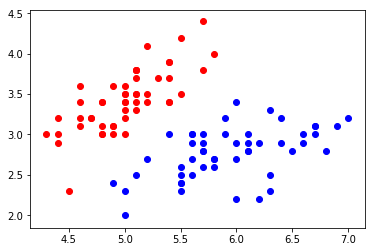

In [26]:
from utility import *

mydata = MyData(data_type='clf')
mydata.plot_data()

In [112]:
X, y = mydata.get_dataset()
# SVMなのでラベルを-1と1に変換する
y = np.where(y==0, -1, y)

# sklearnの線形svm

In [28]:
from sklearn.svm import SVC

clf = SVC(random_state=42, kernel='linear')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
coef = (clf.dual_coef_ @ clf.support_vectors_)[0]
intercept = clf.intercept_
print(f'coef:{coef} intercept:{intercept}')

coef:[ 2.22720466 -2.24959915] intercept:[-4.9417852]


In [30]:
clf.support_vectors_

array([[4.9, 3. ],
       [5.7, 3.8],
       [5.4, 3.4],
       [5. , 3. ],
       [5.4, 3.4],
       [5.5, 3.5],
       [4.5, 2.3],
       [4.8, 3. ],
       [4.9, 2.4],
       [5.2, 2.7],
       [5.6, 3. ],
       [5.9, 3.2],
       [5.4, 3. ],
       [6. , 3.4],
       [5.6, 3. ],
       [5.1, 2.5]])

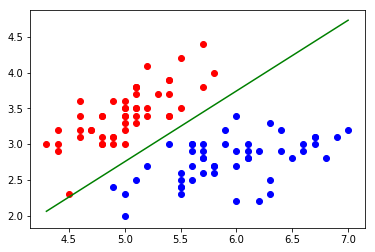

In [31]:
mydata.plot_boundary(coef, intercept)

# 自力で実装

$$
L(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \boldsymbol{1} - \frac{1}{2} \boldsymbol{\alpha}^T \boldsymbol{H} \boldsymbol{\alpha} - \frac{1}{2} \beta \boldsymbol{\alpha}^T \boldsymbol{t} \boldsymbol{t}^T \boldsymbol{\alpha}\\
\\
\frac{\partial L}{\partial \boldsymbol{\alpha}} = \boldsymbol{1} - H \boldsymbol{\alpha} - \beta \boldsymbol{t} \boldsymbol{t}^T \boldsymbol{\alpha}\\
\\
\frac{\partial L}{\partial {\beta}} = -\frac{1}{2} \boldsymbol{\alpha}^T \boldsymbol{t} \boldsymbol{t}^T \boldsymbol{\alpha}
$$

In [113]:
class MyLinearSVM():
    def __init__(self, max_iter=1000):
        self.max_iter = max_iter
        
    def fit(self, X, y):
        sample_size = len(X)
        alpha = np.zeros(sample_size)
        beta = 1.0
        eta_al = 0.0001
        eta_be = 0.1
        tt = np.c_[y] @ np.c_[y].T
        H = (tt * (X @ X.T))
        
        for itr in range(self.max_iter):
            tmp_alpha = np.copy(alpha)
            delta = np.ones(sample_size) - H @ alpha - beta * tt @ alpha
            alpha += eta_al * delta
            beta += 0.5 * eta_be * (tmp_alpha.T @ y) ** 2

        index = alpha > 0
        self.coef_ = (alpha * y).T @ X
        self.intercept_ = (y[index] - X[index] @ self.coef_).mean()
    
    def predict(self, X):
        tmp = (X @ self.coef_ +self.intercept_ > 0)
        ans = np.where(tmp==0, -1, tmp)
        return ans
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ans = (y == y_pred).sum() / len(y)
        return ans

In [115]:
mclf = MyLinearSVM()
mclf.fit(X, y)
mclf.score(X, y)

0.99

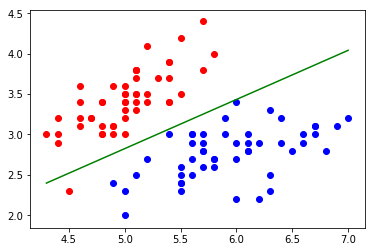

In [110]:
mydata.plot_boundary(mclf.coef_, mclf.intercept_)